In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import yfinance as yf
import seaborn as sb





from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')




url = "https://raw.githubusercontent.com/Thanhibanani/DAVE3625Oblig2/main/TSLA.csv"
#Find the raw url from the github repo
df = pd.read_csv(url)
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
3351,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000


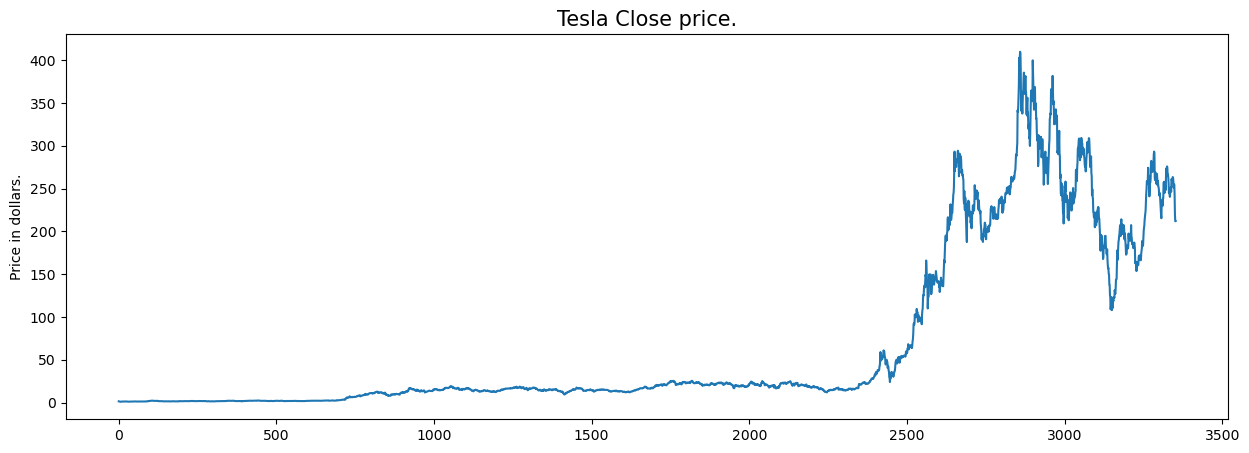

In [246]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [247]:
df[df['Close'] == df['Adj Close']].shape


(3353, 7)

In [248]:
df = df.drop(['Adj Close'], axis=1)


In [249]:
df.shape


(3353, 6)

In [250]:
df.describe()


,Open,High,Low,Close,Volume
count,3353.000000,3353.000000,3353.000000,3353.000000,3.353000e+03
mean,68.199012,69.716799,66.566910,68.181274,9.648795e+07
std,100.369583,102.634101,97.880065,100.292268,8.052958e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,10.160000,10.476667,9.910667,10.094000,4.547310e+07
50%,16.799999,17.033333,16.554667,16.790667,8.031150e+07
75%,66.663330,67.731331,66.001335,66.785332,1.232010e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [251]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3353 non-null   object 
 1   Open    3353 non-null   float64
 2   High    3353 non-null   float64
 3   Low     3353 non-null   float64
 4   Close   3353 non-null   float64
 5   Volume  3353 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 157.3+ KB


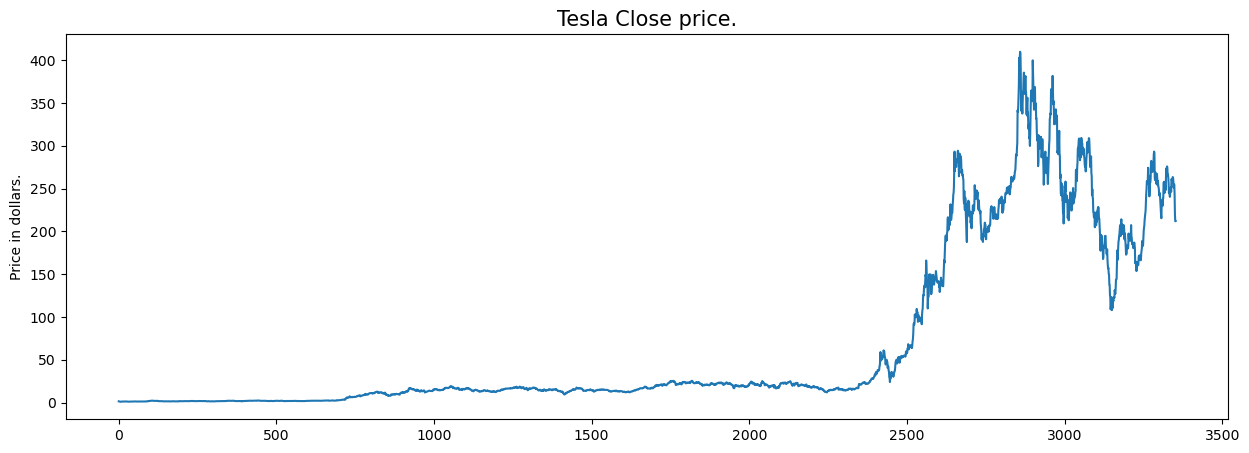

In [252]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [253]:
df.head()


,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [254]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [255]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

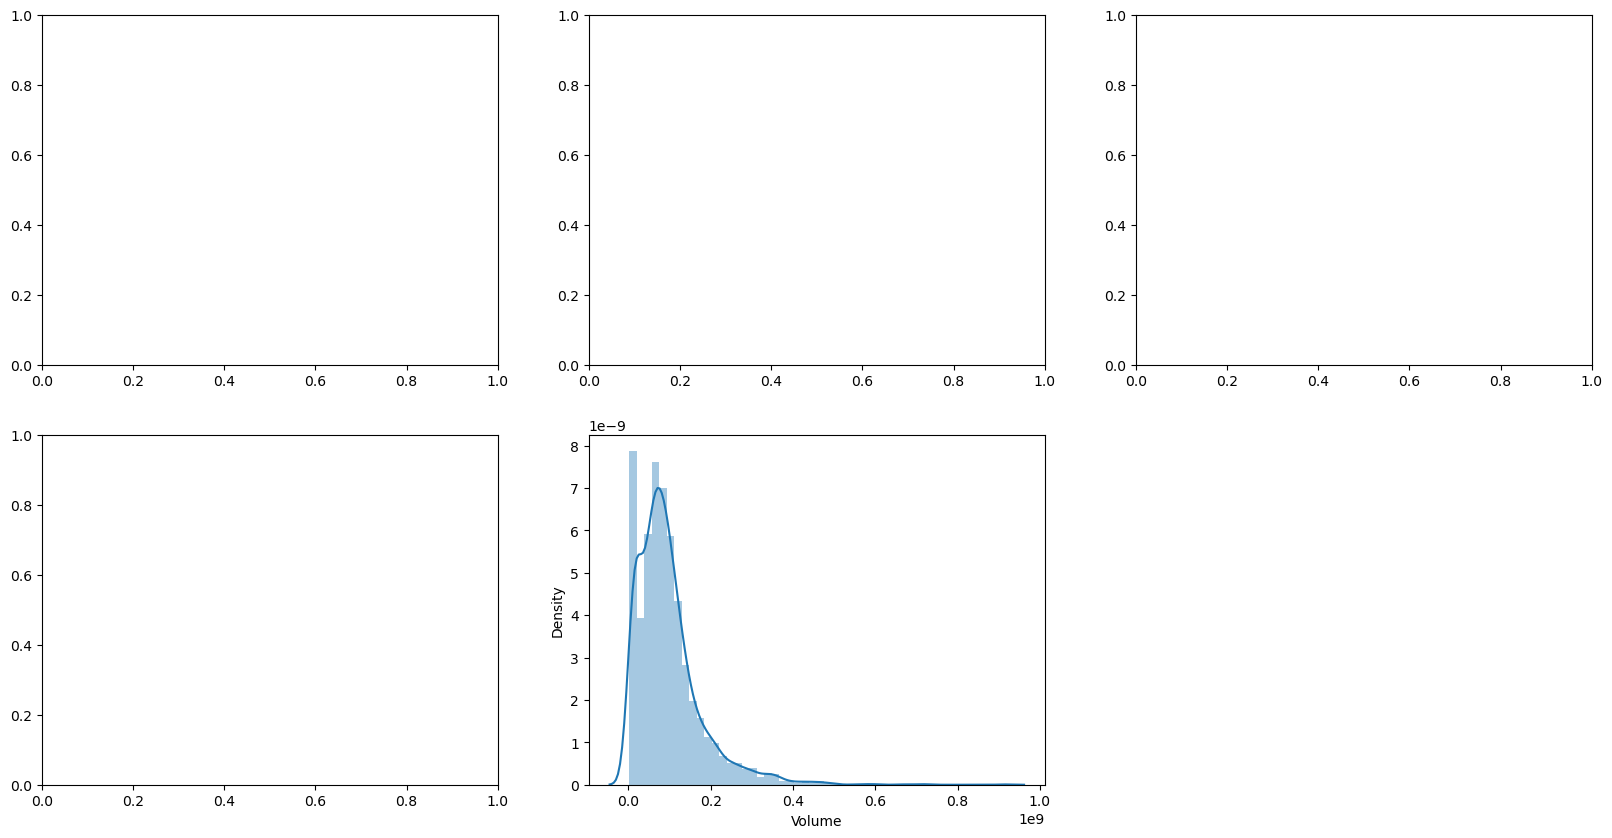

In [256]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
sb.distplot(df[col])
plt.show()


In [257]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()



,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,6,2010,29
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,6,2010,30
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,7,2010,1
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,7,2010,2
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,7,2010,6


In [258]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,6,2010,29,1
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,6,2010,30,1
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,7,2010,1,1
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,7,2010,2,1
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,7,2010,6,1


In [259]:
df['low'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,low
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,6,2010,29,1,1
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,6,2010,30,1,1
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,7,2010,1,1,1
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,7,2010,2,1,1
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,7,2010,6,1,1


In [260]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3353 non-null   object 
 1   Open            3353 non-null   float64
 2   High            3353 non-null   float64
 3   Low             3353 non-null   float64
 4   Close           3353 non-null   float64
 5   Volume          3353 non-null   int64  
 6   day             3353 non-null   int32  
 7   month           3353 non-null   int32  
 8   year            3353 non-null   int32  
 9   is_quarter_end  3353 non-null   int32  
 10  low             3353 non-null   int32  
dtypes: float64(4), int32(5), int64(1), object(1)
memory usage: 222.8+ KB
None


In [261]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


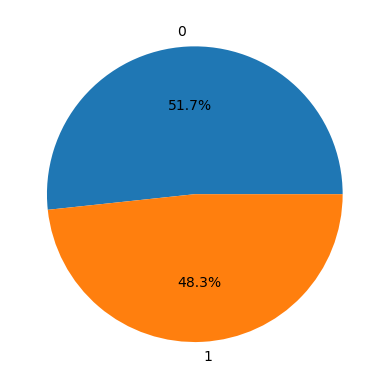

In [262]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [263]:
df['Date'] = pd.to_datetime(df['Date'])




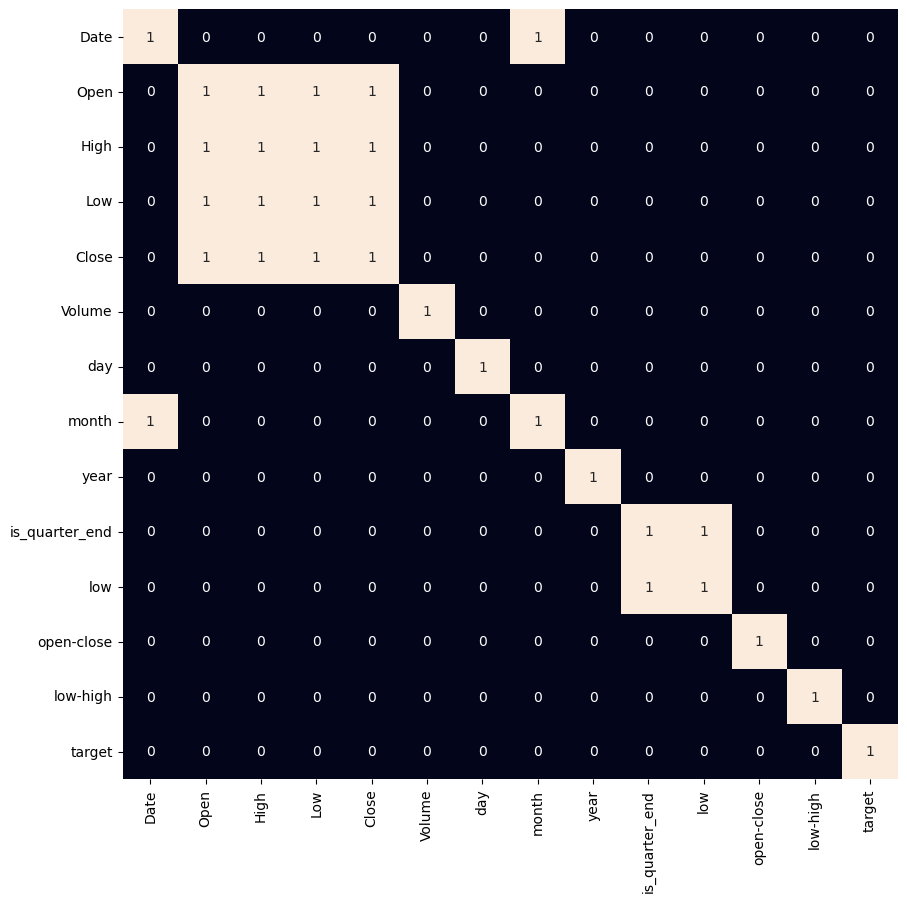

In [264]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [265]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(3017, 3) (336, 3)


In [266]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
	models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9054362473407603
Validation Accuracy :  0.5319597491407717



In [267]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()


AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'